## Auto 계정의 분포

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("../3.통합/4.주당평균_파생변수/train_create_mean.csv")
auto = pd.read_csv("../4.분류/Human-Auto 분리/id_auto_1.csv")
train = pd.merge(train, auto, how='inner')
train = train.loc[:, (train!=0).any(axis=0)]

print(train.shape)
print("----------------------------")
print("----------------------------")
print(train.head())
print("----------------------------")
print("----------------------------")
print(train.columns)

(15590, 96)
----------------------------
----------------------------
                                              acc_id     label  activated_wk  \
0  0000264b01392acfde44f9d8494f112a701dc5d3e5fda6...      week             2   
1  00036e5b6a197c196fa10fc0ad4e2853b22294dff64d27...     month             6   
2  0003b127aa1c0c34490db8817574482464aad9f99cffde...     month             8   
3  0006502148dc2533ef4ac4b9939ee19f18483a7c3c7256...     month             8   
4  000c35a59542816b583a690a4db87b73eba18a4cb467ba...  retained             8   

   avg_cnt_dt  avg_play_time    avg_npc_exp  avg_npc_hongmun  avg_quest_exp  \
0    6.000000    7227.625000  205818.000000     41765.500000   1.370501e+07   
1    5.166667     267.033333    1626.333333      3919.166667   4.314633e+05   
2    4.875000     295.272917       0.000000     26100.625000   0.000000e+00   
3    6.375000    3507.785417   42033.625000    473996.750000   2.462509e+06   
4    5.875000    4239.043750   45742.500000    641239.

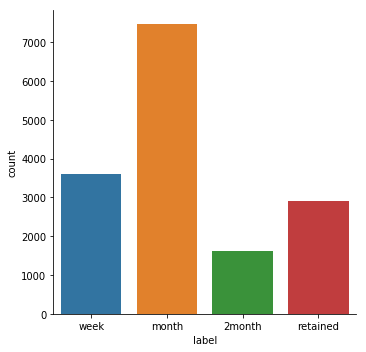

In [3]:
order = ["week", "month", "2month", "retained"]

sns.catplot("label", kind="count", data=train, order=order)
plt.show()

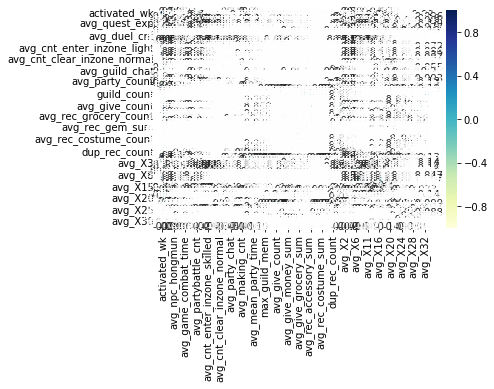

In [4]:
correlations = train.corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)
plt.show()

## 상관계수 살펴보기

In [5]:
correlations_abs_sum = correlations.abs().sum()
correlations_abs_sum
print("낮은 것 20개")
print(correlations_abs_sum.nsmallest(20))
print("높은 것 20개")
print(correlations_abs_sum.nlargest(20))

낮은 것 20개
avg_X21                         0.000000
avg_cnt_enter_inzone_skilled    1.756321
avg_duel_win                    2.420895
avg_duel_cnt                    2.429057
avg_normal_chat                 2.583382
avg_gathering_cnt               2.633158
avg_X32                         2.791557
avg_give_accessory_count        3.092010
avg_making_cnt                  3.460036
avg_X31                         3.572905
avg_give_accessory_sum          3.588682
avg_X29                         4.109830
avg_X30                         4.395336
avg_X27                         4.805947
avg_X20                         5.508733
avg_get_money                   5.632991
avg_X8                          5.871726
avg_partybattle_cnt             6.058002
avg_partybattle_win             6.088862
avg_X7                          6.108967
dtype: float64
높은 것 20개
avg_whisper_chat               24.912911
dup_give_count                 24.225438
avg_cnt_enter_inzone_light     24.082501
avg_cnt_clear_inzone_lig

# 파생변수 설명
* X1 : 플레이시간 대비 전투시간
* X2 : 플레이시간 대비 파티시간
* X3 : 전체 몹 경험치
* X4 : 전체 퀘스트 경험치
* X5 : 전체 홍문 경험치
* X6 : 전체 경험치
* X7 : 단위시간당 경험치
* X8 : 단위시간당 얻은 금화
* X9 : 전체 인던 입장 횟수
* X10 : 전체 레이드 입장 횟수
* X11 : 인던 + 레이드 입장 횟수
* X12 : 전체 인던 클리어 횟수
* X13 : 전체 레이드 클리어 횟수
* X14 : 인던 + 레이드 클리어 횟수
* X15 : 전체 채팅 횟수
* X16 : 일반 채팅 비율
* X17 : 귓속말 비율
* X18 : 지역 채팅 비율
* X19 : 파티 채팅 비율
* X20 : 길드 채팅 비율
* X21 : 세력 채팅 비율
* X22 : 단위시간당 채팅 횟수
* X23 : 주간 얻은 금화
* X24 : 거쳐간 금화 절대값
* X25 : 얻은 잡화
* X26 : 거쳐간 잡화 절대값
* X27 : 단위시간당 X23
* X28 : 단위시간당 X24
* X29 : 단위시간당 X25
* X30 : 단위시간당 X26
* X31 : 채집, 제작 횟수
* X32 : 단위시간당 X31
* X33 : 단위시간당 거래 횟수
* X34 : 단위시간당 유료결제량

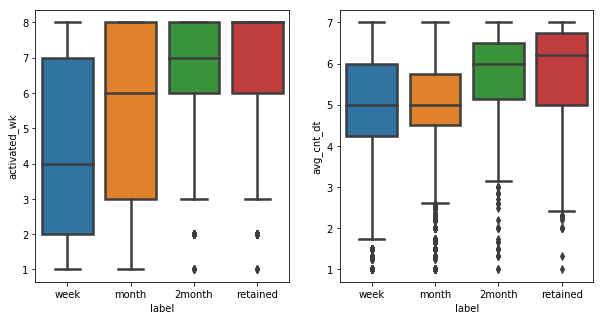

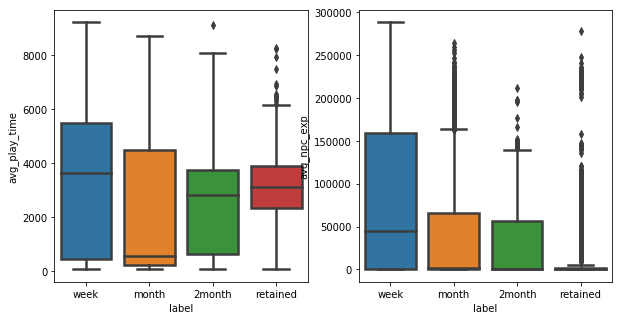

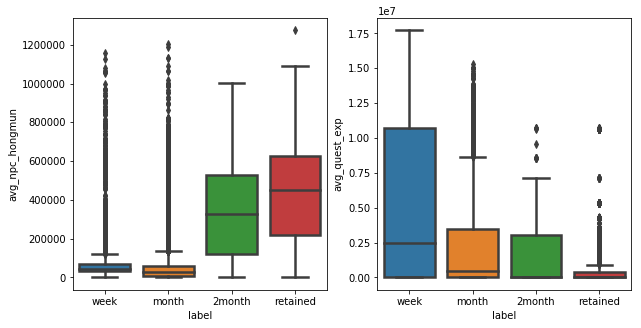

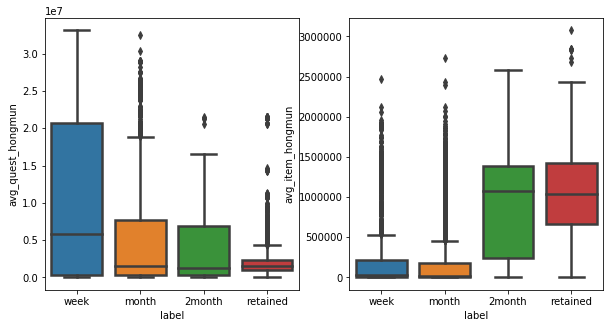

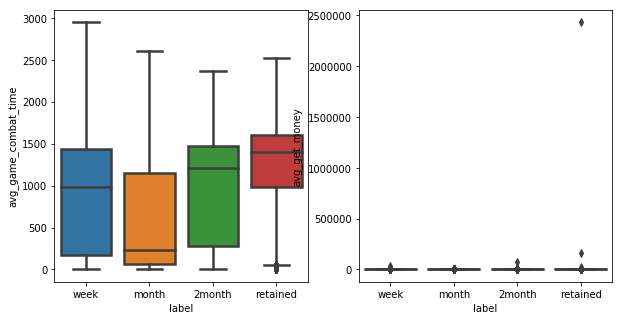

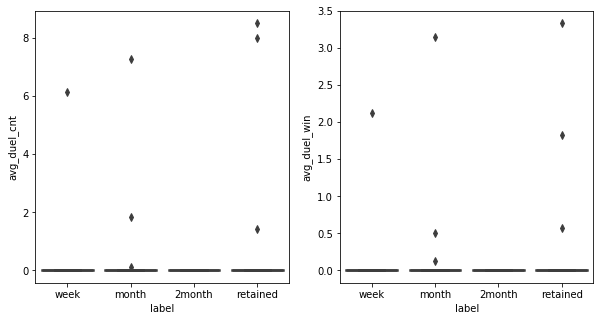

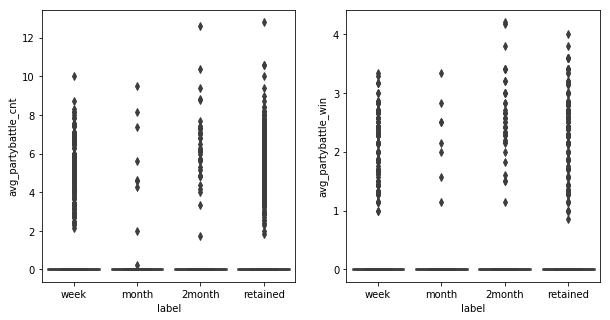

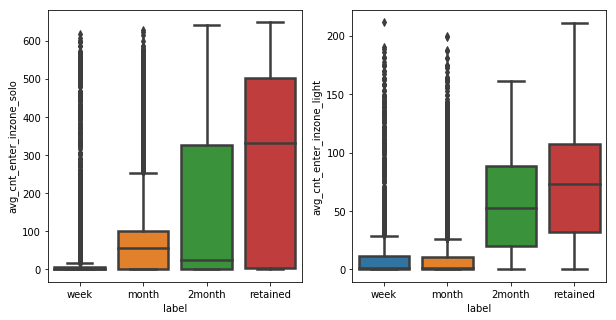

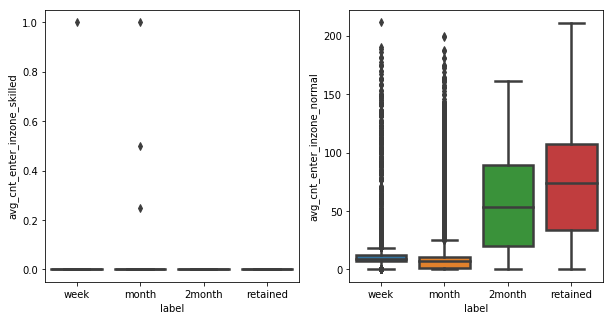

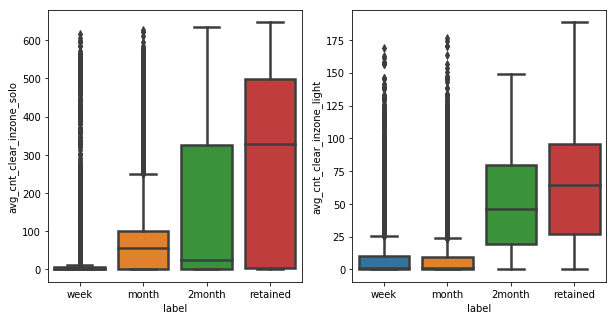

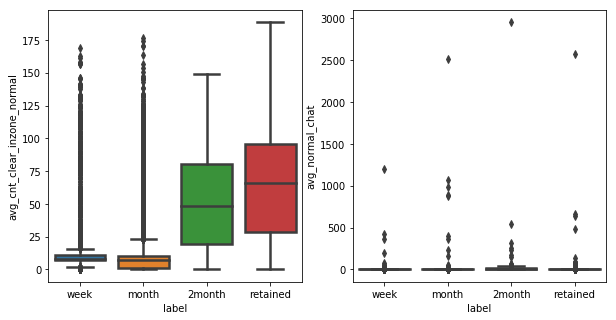

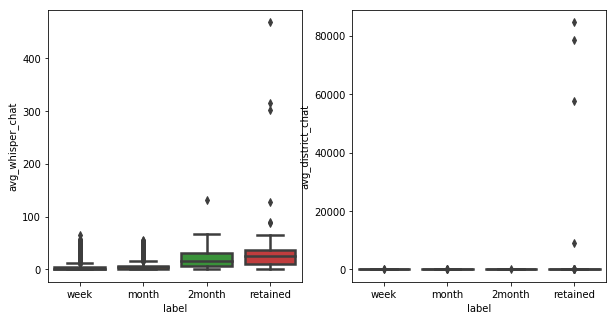

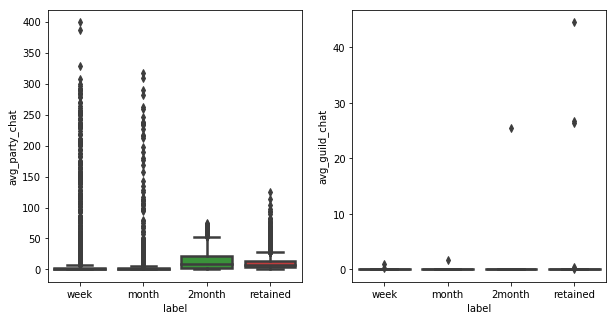

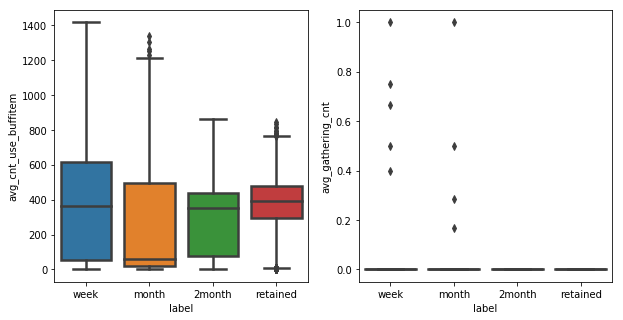

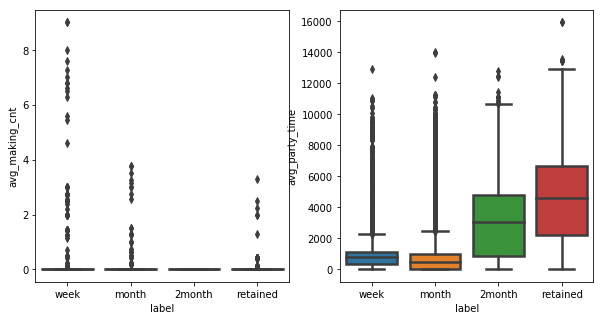

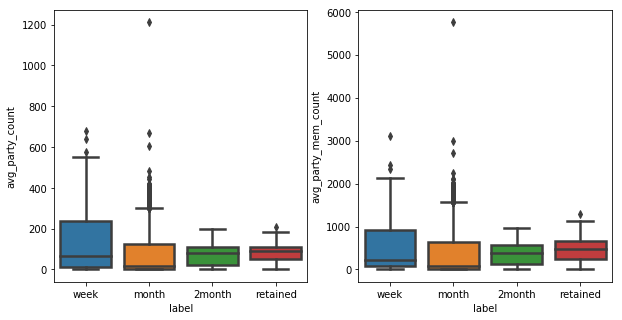

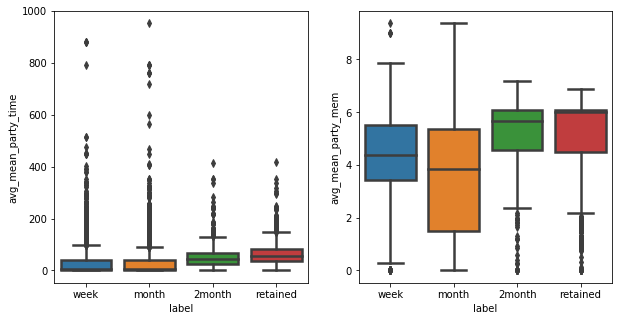

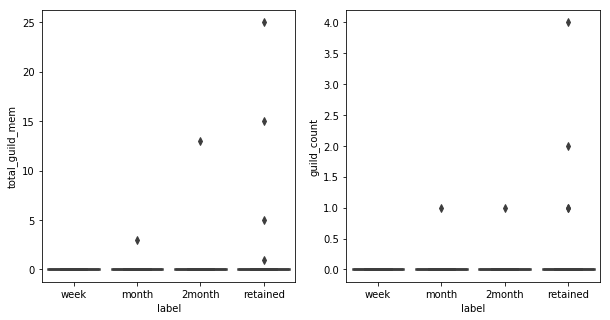

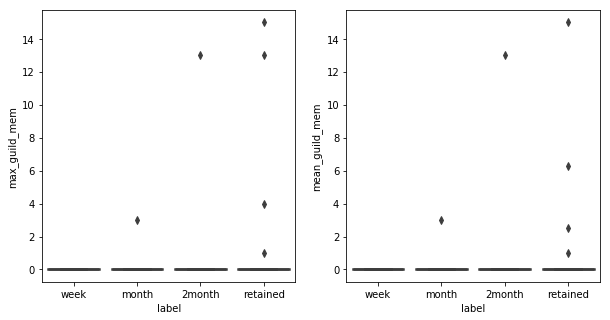

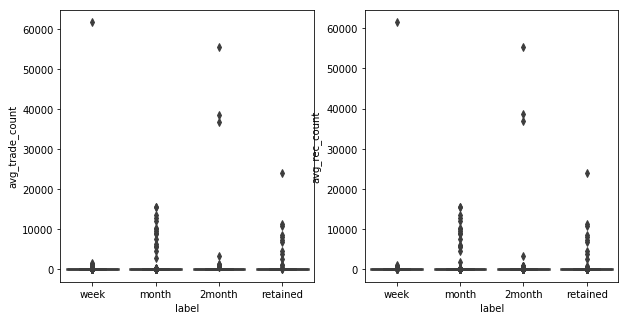

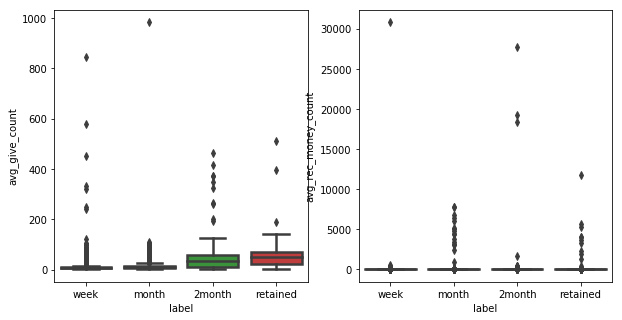

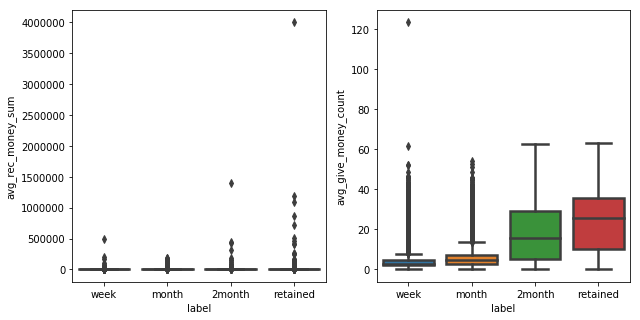

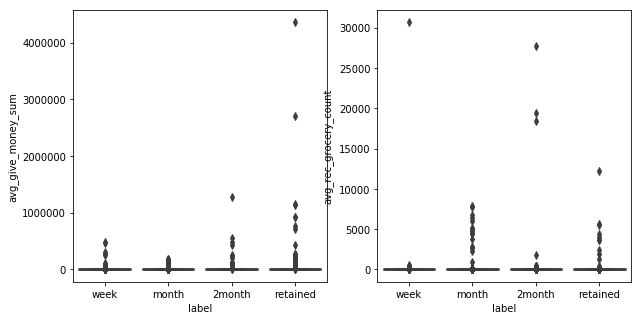

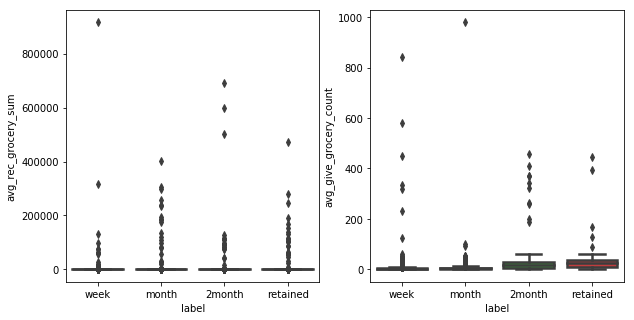

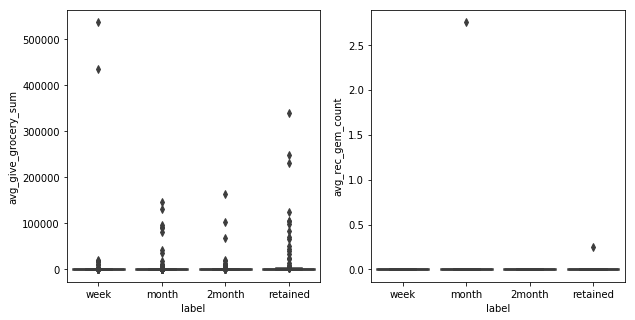

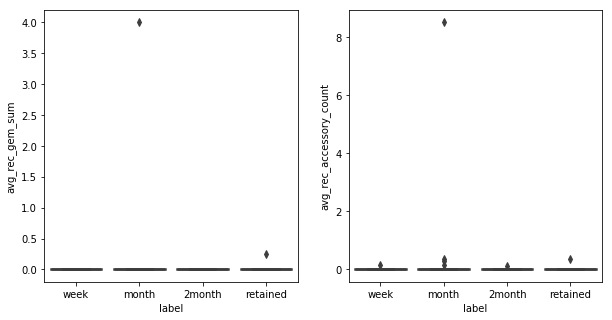

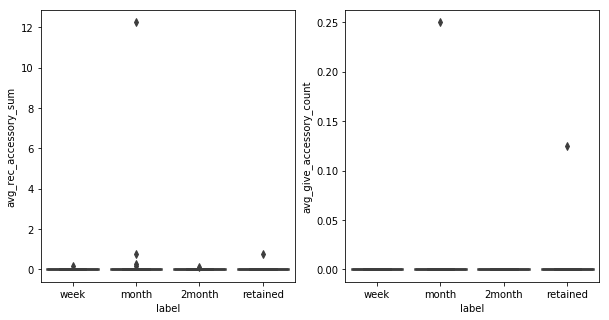

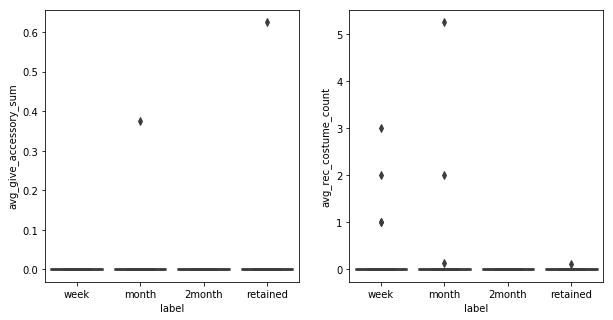

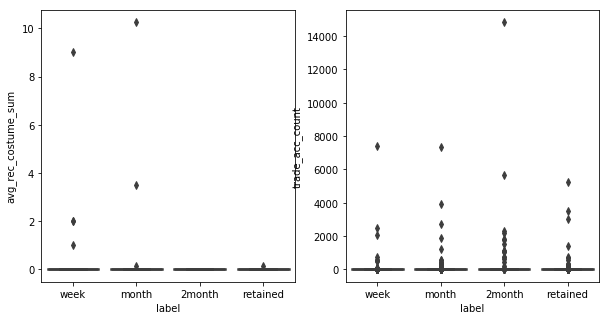

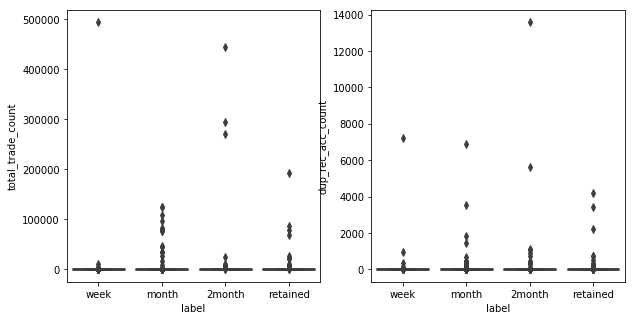

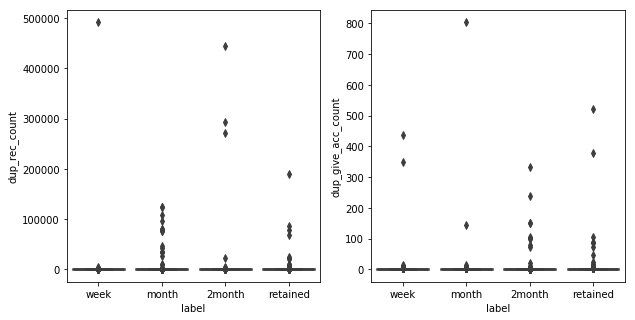

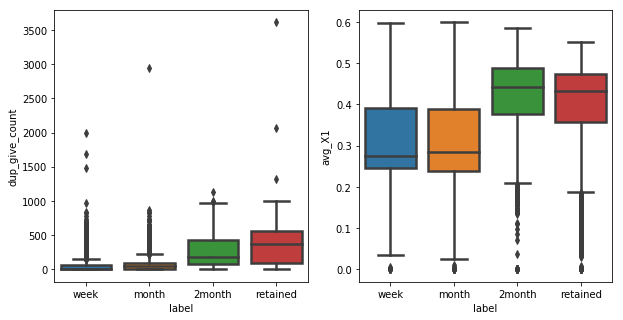

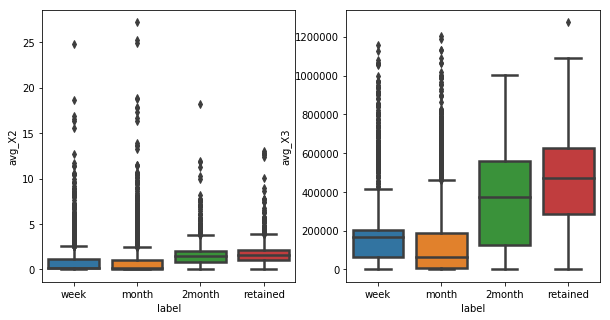

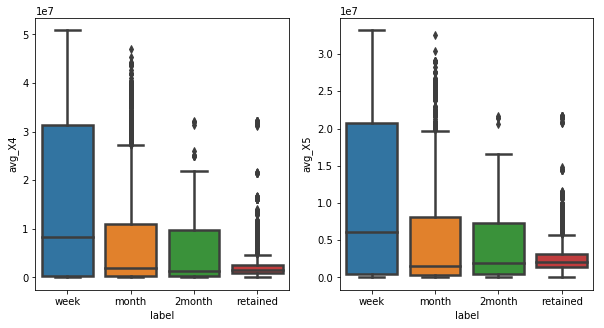

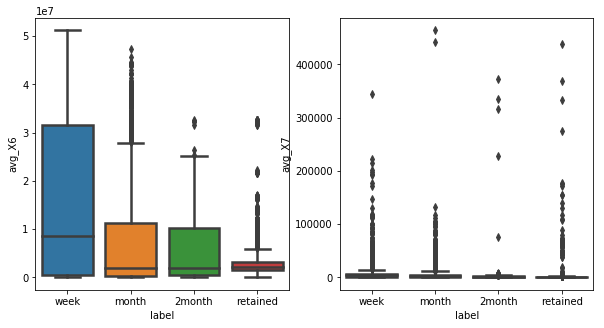

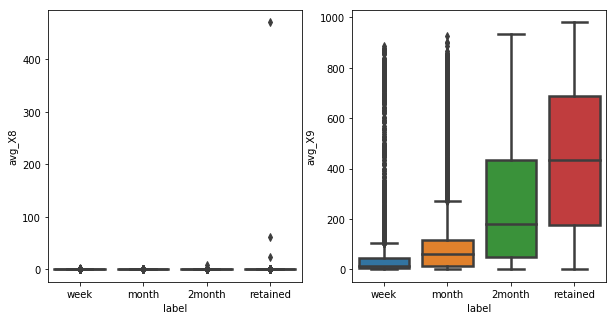

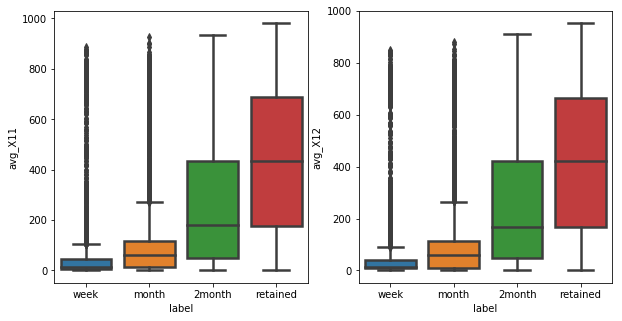

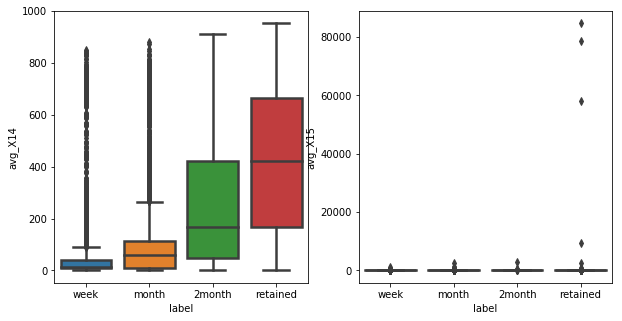

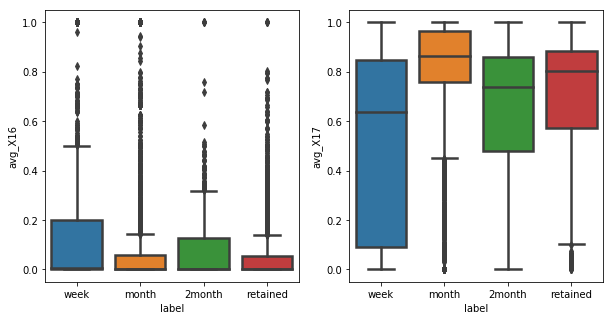

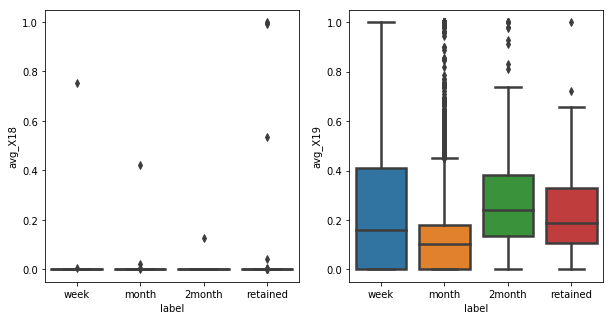

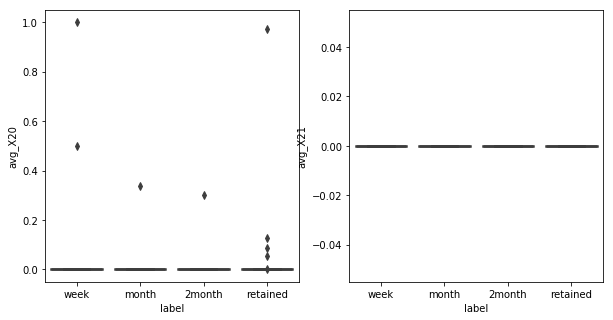

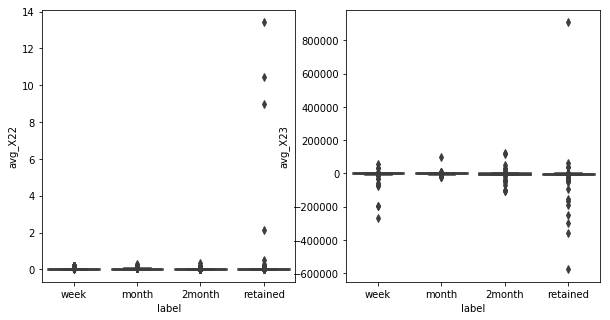

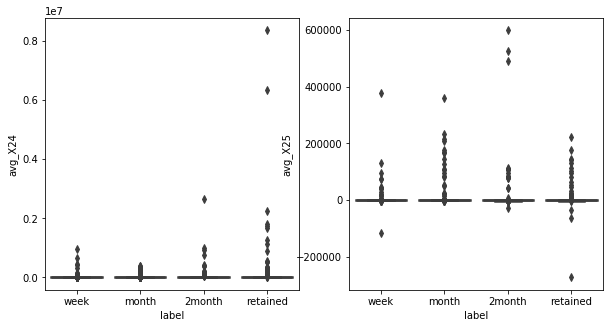

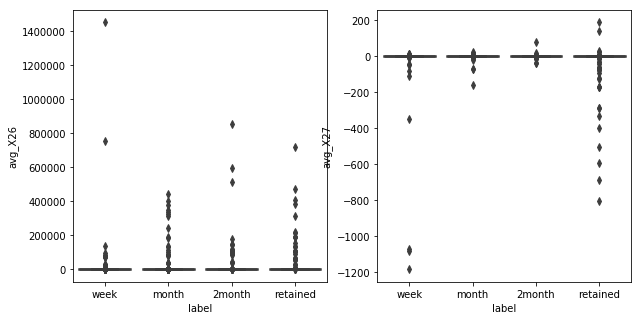

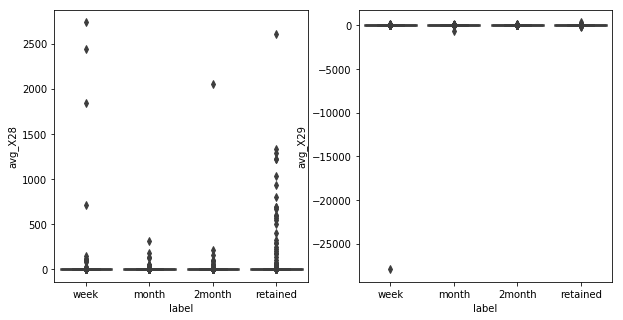

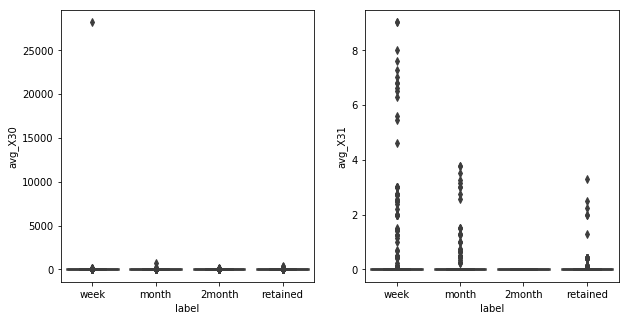

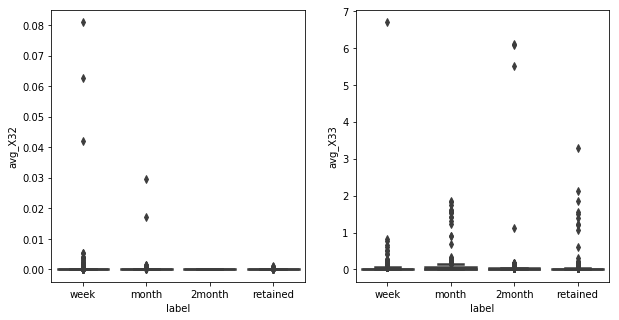

In [6]:
plt.rcParams["figure.figsize"] = (10, 5)

for i in range(1, len(train.columns)//2):
    fig, axis = plt.subplots(ncols=2)
    sns.boxplot(x='label', y=train.columns[2*i], data=train, linewidth=2.5, ax=axis[0], order=order)
    sns.boxplot(x='label', y=train.columns[2*i+1], data=train, linewidth=2.5, ax=axis[1], order=order)
    plt.show()